In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import random
sys.path.append('..')
from reciproc.graph_generators import er_digraph_dale, draw_weighted_graph,\
plot_eigenvalue_spectra, reciprocitize
from reciproc.threshold_network import threshold_network, show_movie, ei_network
from reciproc.avalanche import network_avalanche_size
from reciproc.parameter_scan import parameter_scan
from IPython.display import HTML

In [34]:
N = 100
k = 10
p = k/N
p_exc = 0.7
graph = er_digraph_dale(N, p, p_exc)

In [35]:
#draw_weighted_graph(graph)
#plt.show()

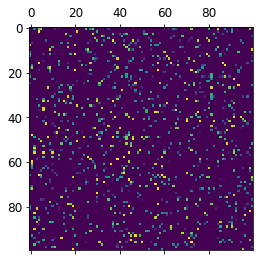

In [36]:
W = nx.to_numpy_matrix(graph)
plt.matshow(W)

In [41]:
index = 50
r0 = np.zeros(N)
r0[index] = 1.0

In [38]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3)])
nx.set_edge_attributes(G, 1, 'weight')
xx = G.out_edges(1, data=True)
[d['weight'] for u,v,d in xx]

[1, 1]

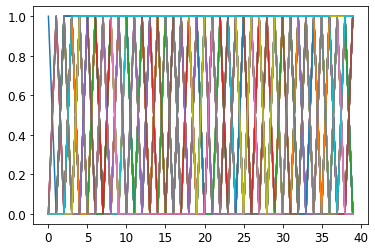

In [42]:
tstep = 40
thresh = 0
r = ei_network(graph, r0, tstep, seed=232)
plt.plot(r[:,:].transpose())
plt.show()

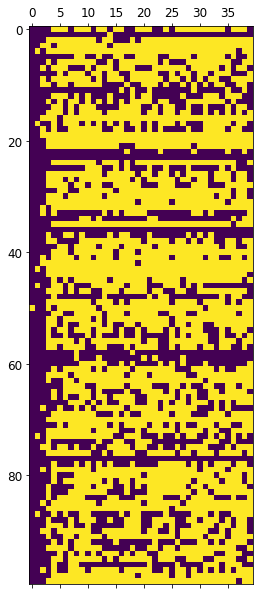

In [43]:
plt.matshow(r)

In [44]:
xx = int(np.sqrt(N))
yy = int(N / xx)
movie = np.reshape(r, (xx, yy, tstep))
print('making movie ...')
#ani = show_movie(movie[:, :, :200])
ani = show_movie(movie)
HTML(ani.to_html5_video())
# TODO debug the last frame of movie the same as first frame

making movie ...


In [7]:
N = 200
p = 0.02
p_exc = 0.3
graph = er_digraph_dale(N, p, p_exc)

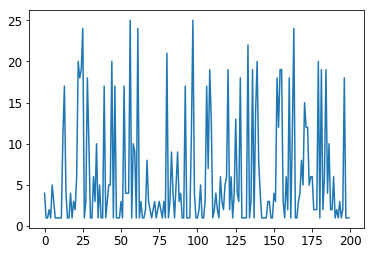

In [8]:
ava_size_list = network_avalanche_size(graph, tstep=30)
plt.plot(ava_size_list)

In [27]:
np.save('results_N1000', results)
np.save('mesh1_N1000', mesh1)
np.save('mesh2_N1000', mesh2)

In [4]:
nb_nodes = 100
k = 10
mesh_step = 0.1
mesh1 = np.arange(0, 1+mesh_step, mesh_step)*k/nb_nodes
mesh2 = np.arange(0, 1+mesh_step, mesh_step)
par_list = ['p_edge', 'p_exc']
mesh_list = [mesh1, mesh2]
fixed_par = {'p_reci': 0}
netfunc = ei_network

results = parameter_scan(par_list, mesh_list, fixed_par, nb_nodes, netfunc, tstep=10)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10


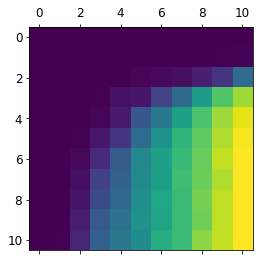

In [24]:
avg_avasize = np.mean(results, axis=2)
plt.matshow(avg_avasize)

In [28]:
nb_nodes = 1000
k = 10
mesh_step = 0.1
mesh1 = np.arange(0, 1+mesh_step, mesh_step)*k/nb_nodes
mesh2 = np.arange(0, 1+mesh_step, mesh_step)
mesh3 = np.arange(0, 1+mesh_step, mesh_step)
scan = 'b'
if scan == 'a':
    par_list = ['p_edge', 'p_reci']
    mesh_list = [mesh1, mesh3]
    fixed_par = {'p_edge': 0.5}
else:
    par_list = ['p_exc', 'p_reci']
    mesh_list = [mesh2, mesh3]
    fixed_par = {'p_edge': k/nb_nodes}

results = parameter_scan(par_list, mesh_list, fixed_par, nb_nodes, tstep=20)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10


In [5]:
par_scan_result = dict(nb_nodes = nb_nodes, 
                       k = k,
                       par_list = par_list,
                       mesh_list = mesh_list,
                       fixed_par = fixed_par)
np.save('par_scan_result_ei100', par_scan_result)

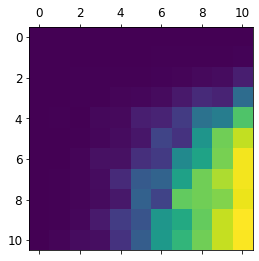

In [6]:
avg_avasize = np.mean(results, axis=2)
plt.matshow(avg_avasize)

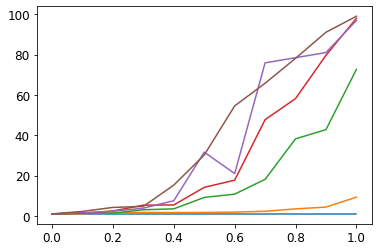

In [8]:
plt.plot(mesh2, avg_avasize[::2,:].transpose())

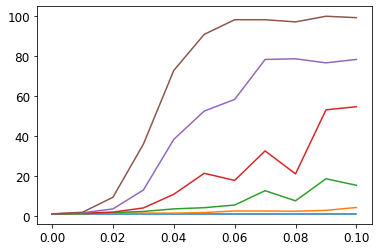

In [9]:
plt.plot(mesh1, avg_avasize[:,::2])